In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.metrics import classification_report

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
from scipy import stats

In [14]:
import pylab as pl

In [15]:
data =  pd.read_csv('C:/Users/erayc/OneDrive/Desktop/Iris.csv')

In [16]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [17]:
print(data.shape)

(150, 5)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


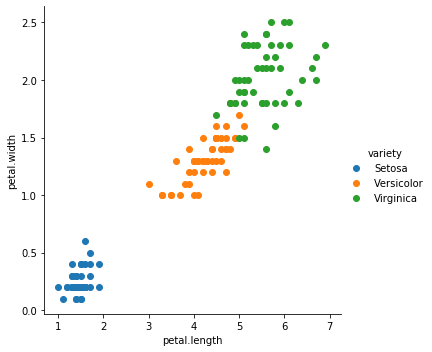

In [19]:
sns.FacetGrid(data, hue='variety',height=5)\
.map(plt.scatter,'petal.length','petal.width')\
.add_legend()

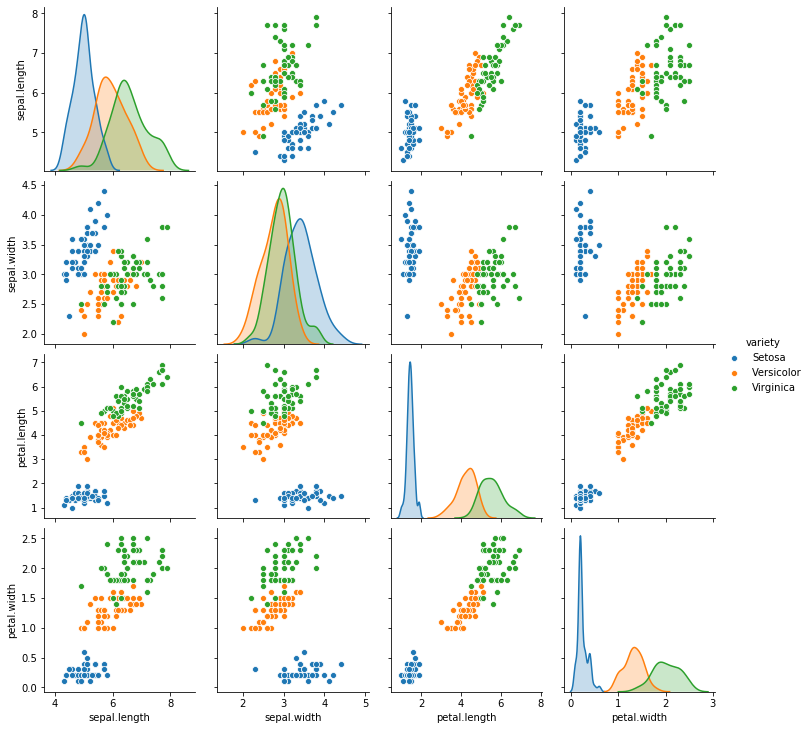

In [20]:
sns.pairplot(data,hue='variety')

In [21]:
X = data.iloc[:, :-1].values

In [22]:
y = data.iloc[:,-1].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [24]:
XL = data.iloc[:, :-1].values

In [25]:
yL = data.iloc[:,-1].values

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
Y_train = le.fit_transform(yL)

In [29]:
print(Y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [30]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL,Y_train, test_size = 0.3, random_state = 0)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
modelLR = LinearRegression()

In [33]:
modelLR.fit(X_trainL, y_trainL)

LinearRegression()

In [34]:
Y_pred = modelLR.predict(X_testL)

In [35]:
from sklearn import metrics

In [36]:
print('y-intercept             :' , modelLR.intercept_)
print('beta coefficients       :' , modelLR.coef_)
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)))
print('r2 value                :' ,metrics.r2_score(y_testL,Y_pred))

y-intercept             : 0.3501722420686415
beta coefficients       : [-0.17009418 -0.01856621  0.27900206  0.56061274]
Mean Abs Error MAE      : 0.19781443339791965
Mean Sqrt Error MSE     : 0.058867619212325105
Root Mean Sqrt Error RMSE: 0.24262650146330905
r2 value                : 0.8998261101639006


In [37]:
# Algorithm - Decision trees

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
Model = DecisionTreeClassifier()

In [40]:
Model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = Model.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [43]:
print(confusion_matrix(y_test,y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [44]:
print('accuracy is', accuracy_score(y_pred,y_test))

accuracy is 0.9777777777777777


In [45]:
# Algorithm - random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
Model = RandomForestClassifier(max_depth=2)

In [48]:
Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [49]:
y_pred = Model.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.94      0.94      0.94        18
   Virginica       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
accuracy is  0.9555555555555556


In [51]:
# Algorithm - Logistic Regression

In [52]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


In [54]:
# Algorithm - K-nearest Neighbour

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
Model = KNeighborsClassifier(n_neighbors=8)

In [57]:
Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [58]:
y_pred = Model.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


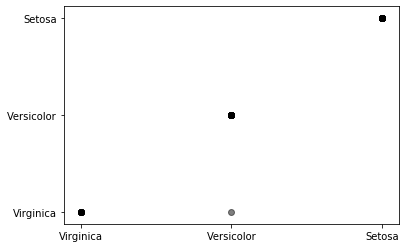

In [60]:
colors = (0,0,0)
plt.scatter(
    y_test,
    y_pred,c=colors,alpha=0.5
)

In [61]:
# Algorithm - Naive bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

In [63]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      1.00      1.00        18
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


In [64]:
# Algorithm - Support Vector Machines

In [65]:
# Support Vector Machine
from sklearn.svm import SVC


In [66]:
Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777
